In [192]:
# Import Libraries and Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import time
import warnings
warnings.filterwarnings("ignore")

In [193]:
# Read the dataset
data=pd.read_csv("HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Very High,80,1,6,3,Better,2,2,2,2


In [194]:
# dimensionality of the dataset
data.shape

(1470, 34)

In [195]:
# Investigate all the elements whithin each Feature 

for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Age :43
The number of values for feature Attrition :2 -- ['No' 'Yes']
The number of values for feature BusinessTravel :3 -- ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
The number of values for feature DailyRate :886
The number of values for feature Department :3 -- ['Human Resources' 'Research & Development' 'Sales']
The number of values for feature DistanceFromHome :29
The number of values for feature Education :5 -- ['Bachelor' 'Below College' 'College' 'Doctor' 'Master']
The number of values for feature EducationField :6 -- ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
The number of values for feature EmployeeNumber :1470
The number of values for feature EnvironmentSatisfaction :4 -- ['High' 'Low' 'Medium' 'Very High']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature HourlyRate :71
The number of values for feature JobInvolvement :4 -- ['High' 'Low' 'Medium'

In [196]:
# infromation about the column names in the dataset and their types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [197]:
# summarization of trainset data
data.describe(include = "all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470,1470,1470.000000,1470,...,1470,1470.0,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,5,6,NaN,4,...,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,Bachelor,Life Sciences,NaN,High,...,High,NaN,NaN,NaN,NaN,Better,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,572,606,NaN,453,...,459,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,NaN,NaN,1024.865306,NaN,...,NaN,80.0,0.793878,11.279592,2.799320,NaN,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,NaN,NaN,602.024335,NaN,...,NaN,0.0,0.852077,7.780782,1.289271,NaN,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,...,NaN,80.0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,NaN,NaN,491.250000,NaN,...,NaN,80.0,0.000000,6.000000,2.000000,NaN,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,NaN,NaN,1020.500000,NaN,...,NaN,80.0,1.000000,10.000000,3.000000,NaN,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,NaN,NaN,1555.750000,NaN,...,NaN,80.0,1.000000,15.000000,3.000000,NaN,9.000000,7.000000,3.000000,7.000000


In [198]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [199]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [200]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [201]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

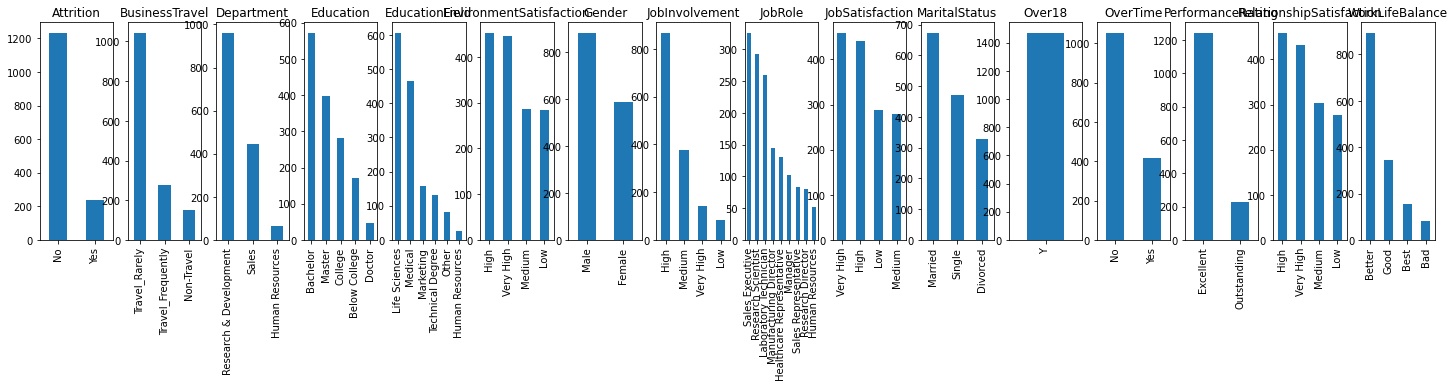

In [202]:
fig, ax = plt.subplots(1, len(categorical_features), figsize=(25, 4))
for i, categorical_feature in enumerate(data[categorical_features]):
    data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

Text(0.5, 1.0, 'WorkLifeBalance')

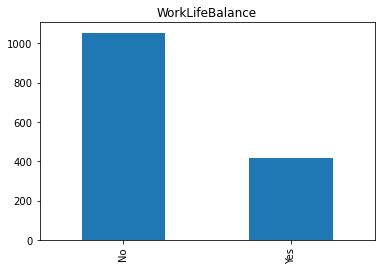

In [203]:
data['OverTime'].value_counts().plot(kind="bar").set_title(categorical_feature)

In [204]:
# let's encode the attrition column so we can use it for EDA
df1 = data.copy()
df1['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,High,80,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Very High,80,1,6,3,Better,2,2,2,2


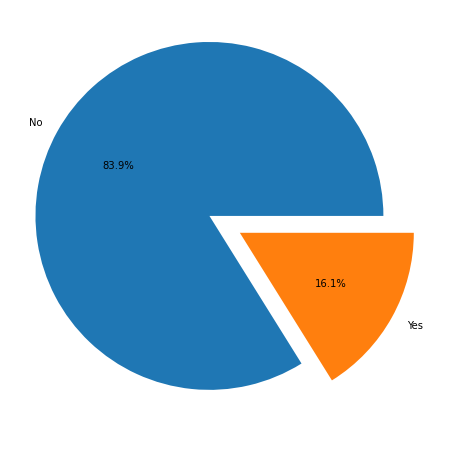

In [205]:
plt.figure(figsize=(8,8))
pie = df1.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

#### 84% of the employees in the dataset have not left the company.

<AxesSubplot:xlabel='Age', ylabel='Density'>

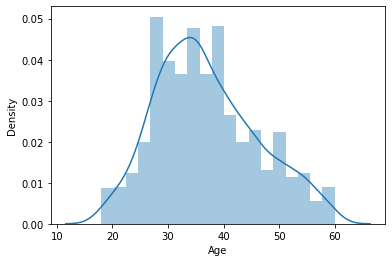

In [206]:
# Distribution of age of all employees
sns.distplot(df1["Age"])

In [207]:
df1[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [208]:
df1[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

#### Most employees are in their 30s with 35 year olds having the highest count and lowest are people at around the age 60 or less than 20.

In [209]:
# dropping these two columns because they only have one value
employee_data = df1.drop(['Over18','StandardHours'], axis=1)

### We can use a heatmap to check correlation between the variables.

<AxesSubplot:>

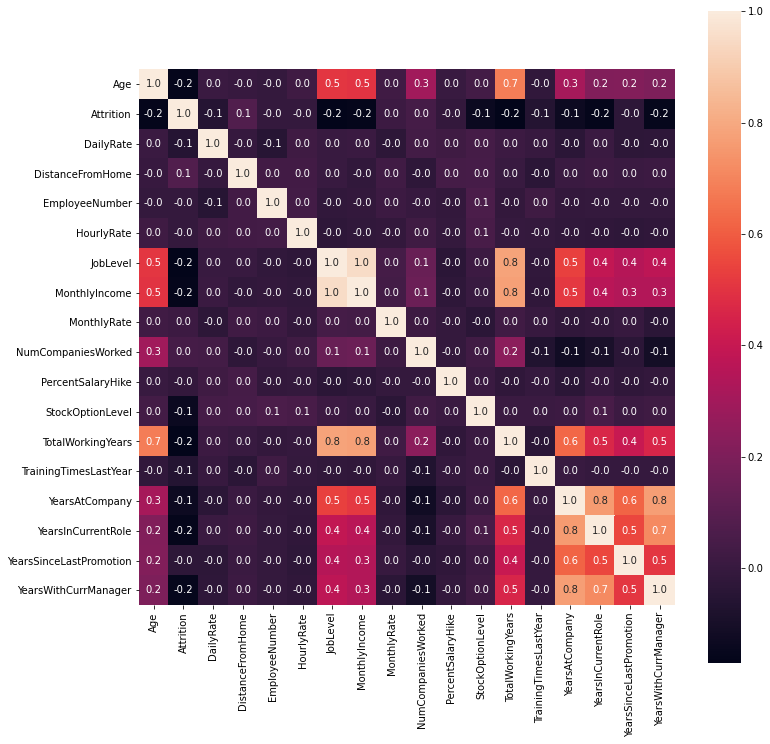

In [210]:
corr = employee_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True)

#### As we can see, there isn't a very strong correlation of the target column with any of the numerical columns. But we can see other correlations such as;

#### More senior employees have higher total working years (very obvious)
#### Higher performance ratings lead to salary hike percentage to increase
#### The more years an employee puts in, the more their monthly income increases
#### A lot of employees remain in their current role and also under the same manager as years pass by meaning they don't get promotion and this could be a major factor contributing to attrition
#### From here, we can deduct that the lack of promotions may be a crucial factor to attritions.

<AxesSubplot:xlabel='YearsAtCompany'>

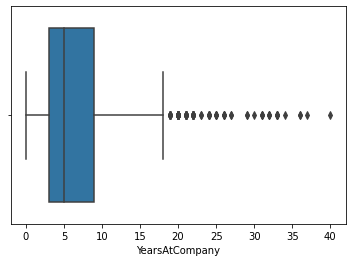

In [211]:
sns.boxplot(employee_data["YearsAtCompany"])

#### Most employees remain in the company for 3-9 years with median being 5 years.

In [212]:
attrition = employee_data[(employee_data['Attrition'] != 0)]
no_attrition = employee_data[(employee_data['Attrition'] == 0)]

In [213]:
def barplot(var_select, x_no_numeric) :
    tmp1 = employee_data[(employee_data['Attrition'] != 0)]
    tmp2 = employee_data[(employee_data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(employee_data[var_select],employee_data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [214]:
def plot_pie(var_select) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

## what is effect of age on attrition ?

In [215]:
barplot('Age', False)

From this relationship between age and Attrition, we can see that

1- The largest percentage of Attrition is from the age of 18 to 21 years, where 50% of employees left the company at the age of 18.
Also, 66% of employees left at the age of 19.

2- The percentage of employees leaving the company between the ages of 27 and 50 years is low.

3- The percentage increases again after the age of 60 years.

From this we conclude that

it is possible that the departed are young people, or they cannot bear the pressure of work or their lack of responsibility

And it is clear that those over the age of 60 leave due to illness problems or retirement.

## How is Attrition Affected by Gender

In [216]:
barplot('Gender', False)

#### Clearly there are more males in the organisation than females, so attritions are higher but slightly. I don't think gender is too significant a factor behind attritions.

## How Is Attrition Affected by business travels?

In [217]:
plot_pie('BusinessTravel')
barplot('BusinessTravel', False)

#### Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition

## What is the Department of most Attritions ?

In [218]:
plot_pie('Department')

<AxesSubplot:xlabel='Department', ylabel='count'>

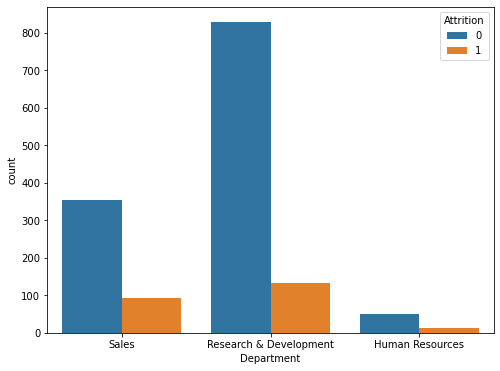

In [219]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=employee_data)

In [220]:
employee_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

#### Most attritions are from the research & development department only for sales department to come second by a small margin. Human resources has the least number of attritions. But we need to keep in mind that R&D has a lot more employees than sales and HR.

#### If we considered percentage of attritions per department, we would see that the HR department has most attritions.

([<matplotlib.patches.Wedge at 0x1b0415fcd90>,
 [Text(-1.417838546774394, 1.7470643535029489, 'No'),
  Text(1.4493460700360459, -1.785888005803015, 'Yes')],
 [Text(-0.7876880815413297, 0.9705913075016381, '71.7%'),
  Text(0.8191956048029824, -1.0094149598017041, '28.3%')])

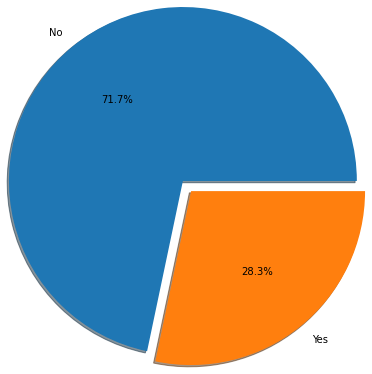

In [221]:
r = employee_data.groupby('OverTime')['OverTime'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=2.0, autopct='%1.1f%%',  shadow=True)

#### Most of the employees don't work overtimes

## What is Affect of YearsWithCurrManager on Attrition ?

In [222]:
barplot('YearsWithCurrManager', False)

In [223]:
man_att=employee_data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

#### We notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager.
#### At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. 
#### At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change.
#### When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low

## What is Affect of YearsInCurrRole on Attrition ?

In [224]:
yrscr_att=employee_data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')


#### People are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

## Affects of Salary on Attrition ?

In [225]:
rate_att=employee_data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

####  The attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

## Affects of Salary on Attrition based on Job Roles ?

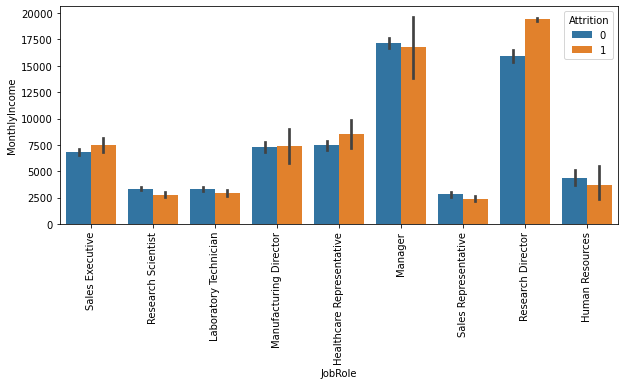

In [226]:
plt.figure(figsize=(10,4))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=employee_data)
plt.xticks(rotation = 90)
plt.show()

#### As doubted, laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.

#### Also, as we had seen earlier, the HR department had the most attritions and we can see they have very low salaries as well.

## Affects of Hike Percentage on Attrition? 

In [227]:
hike_att= employee_data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

#### Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

# Conclusion

#### Salary and stock ptions have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees remain loyal to their company. 
#### Increasing employee salary in some departments such as sales and HR would be recommended. And give promotions on a regular basis to those who deserve them

#### Most of the people who leave the company are located more than 15 km away from the company

#### People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization

# Data Pre-processing

In [228]:
# Separating the features from the target.
X = employee_data.drop(['Attrition'],axis=1) # Features
y = employee_data['Attrition'].values.ravel() # Target

In [229]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,College,Medical,2061,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8


In [230]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [231]:
# Label encoding the categorical variables

X['BusinessTravel'] = preprocessing.LabelEncoder().fit_transform(X['BusinessTravel'])
X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['EducationField'] = preprocessing.LabelEncoder().fit_transform(X['EducationField'])
X['EnvironmentSatisfaction'] = preprocessing.LabelEncoder().fit_transform(X['EnvironmentSatisfaction'])
X['JobInvolvement'] = preprocessing.LabelEncoder().fit_transform(X['JobInvolvement'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['JobSatisfaction'] = preprocessing.LabelEncoder().fit_transform(X['JobSatisfaction'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['OverTime'] = preprocessing.LabelEncoder().fit_transform(X['OverTime'])
X['PerformanceRating'] = preprocessing.LabelEncoder().fit_transform(X['JobSatisfaction'])
X['RelationshipSatisfaction'] = preprocessing.LabelEncoder().fit_transform(X['JobSatisfaction'])
X['WorkLifeBalance'] = preprocessing.LabelEncoder().fit_transform(X['JobSatisfaction'])

In [232]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,3,3,0,8,0,3,6,4,0,5
1,49,1,279,1,8,1,1,2,0,1,...,2,2,1,10,3,2,10,7,1,7
2,37,2,1373,1,2,2,4,4,3,1,...,0,0,0,7,3,0,0,0,0,0
3,33,1,1392,1,3,4,1,5,3,0,...,0,0,0,8,3,0,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,2,2,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,2061,0,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,2062,3,1,...,1,1,1,9,5,1,7,7,1,7
1467,27,2,155,1,4,0,1,2064,2,1,...,2,2,1,6,0,2,6,2,0,3
1468,49,1,1023,2,2,0,3,2065,3,1,...,2,2,0,17,3,2,9,6,0,8


In [233]:
# Investigate all the elements whithin each Feature 

for column in X:
    unique_vals = np.unique(X[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('')


The number of values for feature BusinessTravel :3 -- [0 1 2]

The number of values for feature Department :3 -- [0 1 2]

The number of values for feature Education :5 -- [0 1 2 3 4]
The number of values for feature EducationField :6 -- [0 1 2 3 4 5]

The number of values for feature EnvironmentSatisfaction :4 -- [0 1 2 3]
The number of values for feature Gender :2 -- [0 1]

The number of values for feature JobInvolvement :4 -- [0 1 2 3]
The number of values for feature JobLevel :5 -- [1 2 3 4 5]
The number of values for feature JobRole :9 -- [0 1 2 3 4 5 6 7 8]
The number of values for feature JobSatisfaction :4 -- [0 1 2 3]
The number of values for feature MaritalStatus :3 -- [0 1 2]



The number of values for feature OverTime :2 -- [0 1]

The number of values for feature PerformanceRating :4 -- [0 1 2 3]
The number of values for feature RelationshipSatisfaction :4 -- [0 1 2 3]
The number of values for feature StockOptionLevel :4 -- [0 1 2 3]

The number of values for feature Train

In [234]:
X = pd.get_dummies(X, columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',
                                'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
                                'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                                'TrainingTimesLastYear', 'WorkLifeBalance'])
X.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_0,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3
0,41,1102,1,1,94,5993,19479,8,11,8,...,0,0,0,0,0,0,0,0,0,1
1,49,279,8,2,61,5130,24907,1,23,10,...,0,0,1,0,0,0,0,0,1,0
2,37,1373,2,4,92,2090,2396,6,15,7,...,0,0,1,0,0,0,1,0,0,0
3,33,1392,3,5,56,2909,23159,1,11,8,...,0,0,1,0,0,0,1,0,0,0
4,27,591,2,7,40,3468,16632,9,12,6,...,0,0,1,0,0,0,0,0,1,0


In [235]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [236]:
X

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.49467957,
        -0.48507125,  1.48412074],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.49467957,
         2.06155281, -0.67379963],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.49467957,
        -0.48507125, -0.67379963],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.49467957,
         2.06155281, -0.67379963],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.49467957,
         2.06155281, -0.67379963],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.49467957,
        -0.48507125, -0.67379963]])

In [237]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [238]:
print("X.shape = ",X.shape)
print("X_train.shape = ",X_train.shape)
print("X_test.shape = ",X_test.shape)

print("\ny.shape = ",X.shape)
print("y_train.shape = ",X_train.shape)
print("y_test.shape = ",X_test.shape)

X.shape =  (1470, 87)
X_train.shape =  (1176, 87)
X_test.shape =  (294, 87)

y.shape =  (1470, 87)
y_train.shape =  (1176, 87)
y_test.shape =  (294, 87)


# ML Model Building

In [239]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  1.0
Testing Accuracy is:  0.8639455782312925


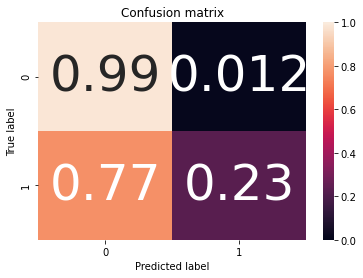

In [240]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.844
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.837
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.837
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.837
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.837
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.861
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.837
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.840
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.840
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.857
Classification accuracy on test set with max features = log2 and max_depth = None: 0.867
Classification accuracy on test set with max features = log2

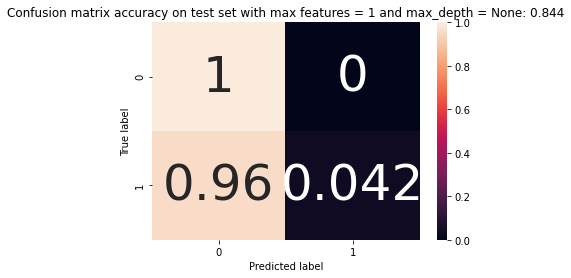

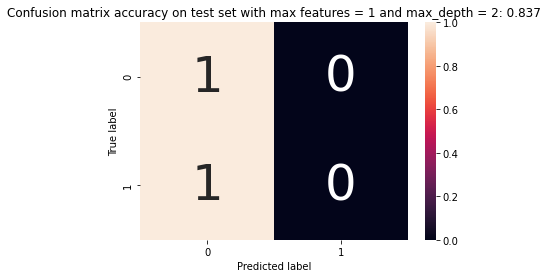

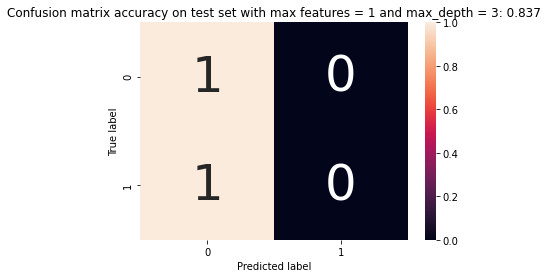

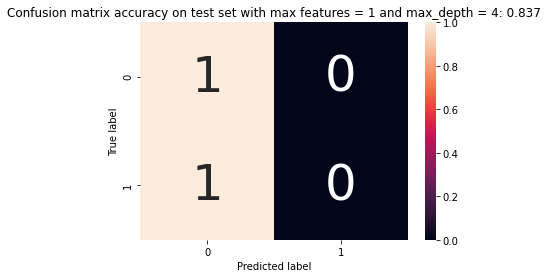

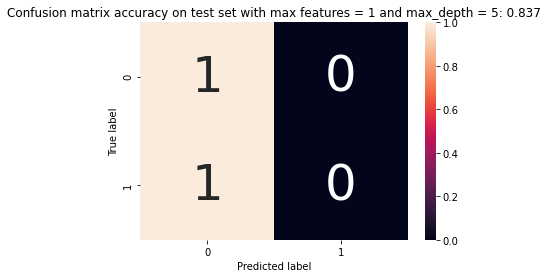

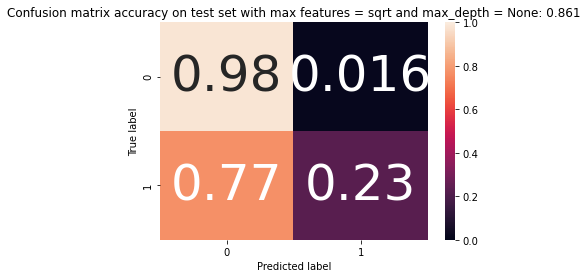

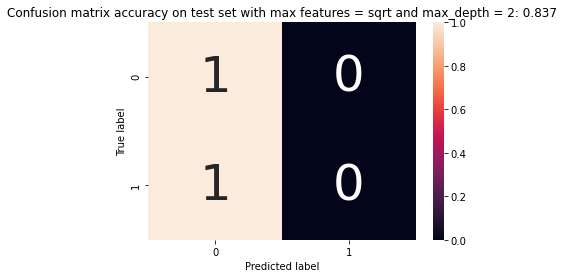

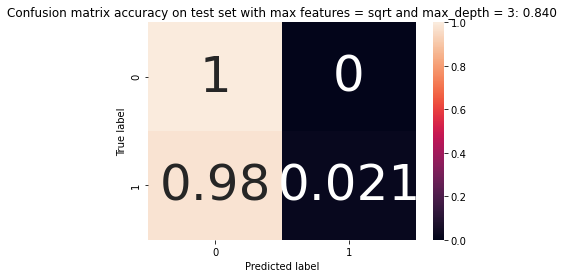

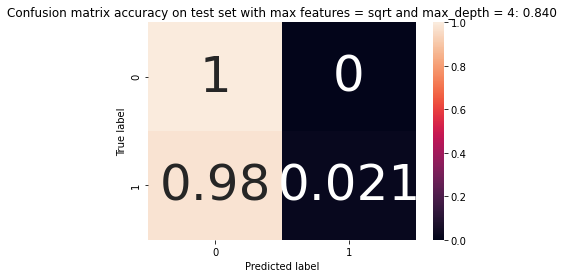

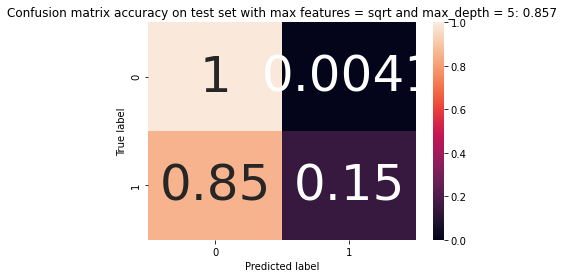

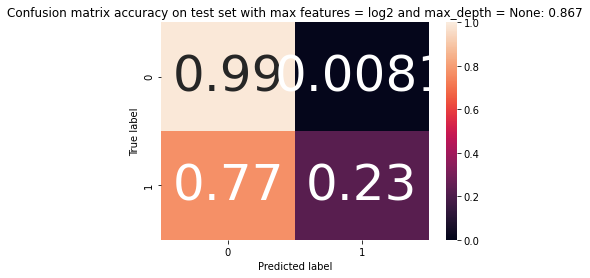

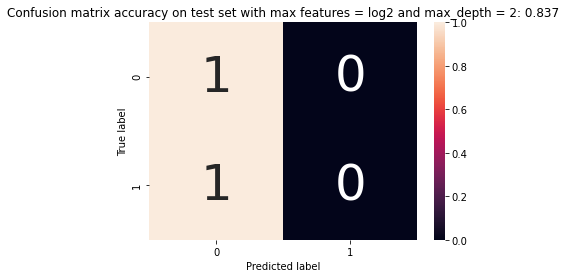

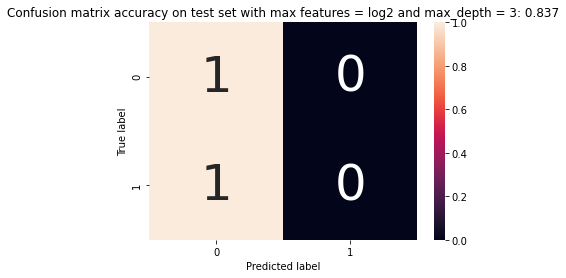

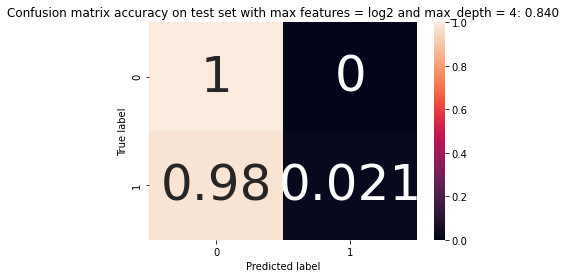

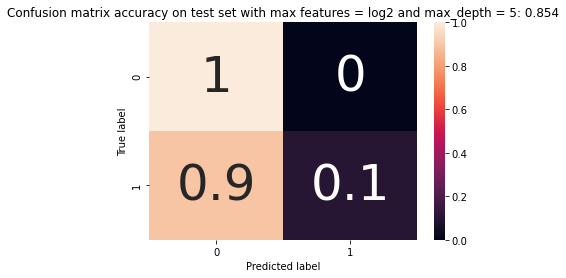

In [241]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [242]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier()

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=2, min_child_weight=7; total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=2, min_child_weight=7; total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=2, min_child_weight=7; total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=2, min_child_weight=7; total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=2, min_child_weight=7; total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.0s
[CV 

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [243]:
clf.best_params_

{'min_child_weight': 7,
 'max_depth': 2,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [244]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

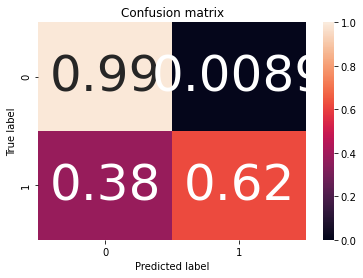

In [245]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=3,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)
pred_prob_xgboost = final_model.predict_proba(X)


# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)


In [246]:
# probabilities
pred_prob_xgboost

array([[0.729794  , 0.27020597],
       [0.94612217, 0.05387783],
       [0.3440805 , 0.6559195 ],
       ...,
       [0.98466307, 0.01533695],
       [0.9765123 , 0.02348769],
       [0.99277216, 0.00722782]], dtype=float32)

In [247]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)

[0.27020597,
 0.053877834,
 0.6559195,
 0.4465829,
 0.24750051,
 0.11701596,
 0.15609172,
 0.1268824,
 0.09377651,
 0.07162669,
 0.05662384,
 0.30093166,
 0.036066025,
 0.018971313,
 0.91541755,
 0.026079398,
 0.056187104,
 0.1729112,
 0.008080396,
 0.22435321,
 0.007049348,
 0.35860893,
 0.053617705,
 0.3544577,
 0.074024685,
 0.003402491,
 0.9238081,
 0.015285885,
 0.04490162,
 0.064725734,
 0.16514865,
 0.016135732,
 0.068584606,
 0.1440801,
 0.4938611,
 0.0017507167,
 0.7443743,
 0.09598141,
 0.3238789,
 0.053621985,
 0.06704039,
 0.16034824,
 0.7601953,
 0.18163091,
 0.053885903,
 0.25301385,
 0.101283036,
 0.090517186,
 0.18583763,
 0.011994686,
 0.7512391,
 0.65752715,
 0.07147166,
 0.04687457,
 0.38510537,
 0.07088142,
 0.15965195,
 0.32144627,
 0.0066672983,
 0.0053298315,
 0.16679513,
 0.11428164,
 0.031504035,
 0.26064378,
 0.028689852,
 0.0068253316,
 0.039732892,
 0.032236703,
 0.06554631,
 0.32668248,
 0.16237678,
 0.01224691,
 0.1921023,
 0.007698266,
 0.02902835,
 0.029

In [248]:
# 9.4. Joining the raw data witht the predictions
output = data.drop(['Over18','StandardHours'], axis=1)
output['Predictions - Attrition or Not'] = pred_xgboost
output['Predictions - Probability of Attrition'] = column(pred_prob_xgboost, 1)
output['Predictions - Attrition or Not Desc'] = 'Empty'
output['Predictions - Attrition or Not Desc'][output['Predictions - Attrition or Not'] == 0] = 'Retention'
output['Predictions - Attrition or Not Desc'][output['Predictions - Attrition or Not'] == 1] = 'Attrition'
output.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Predictions - Attrition or Not,Predictions - Probability of Attrition,Predictions - Attrition or Not Desc
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,8,0,Bad,6,4,0,5,0,0.270206,Retention
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,10,3,Better,10,7,1,7,0,0.053878,Retention
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,7,3,Better,0,0,0,0,1,0.655919,Attrition
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,8,3,Better,8,7,3,0,0,0.446583,Retention
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,6,3,Better,2,2,2,2,0,0.247501,Retention


In [249]:
output.to_csv('Attrition Predictions Output.csv')